# Prediction of game popularity using texual data

In [12]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [75]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [76]:
def mergeSteamAndSteamDescription(steamDescriptions, descriptions, steam):
    descriptions["steam_appid"]=steamDescriptions["steam_appid"]
    df=pd.merge(steam,descriptions,left_on="appid", right_on="steam_appid")
    print(df.columns)
    res=df.iloc[:,20:-1]
#     res["Popularity"]=df;;["Popularity"]
    #y=X.iloc[:,-1]
    return res

In [106]:
steam=pd.read_csv("preprocess_project.csv")
originalSteam=pd.read_csv("steam.csv")
steamDescriptions=pd.read_csv("steam_description_data.csv")
TFIDFDescriptions=pd.read_csv("TFIDFDescriptions.csv")

BOWDescriptions=pd.read_csv("BOWDescriptions.csv")

steam.head()


,day_elapse,achievements,average_playtime,median_playtime,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,Web Publishing.1,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,popularity
0,-3.511424,-0.128306,0.356428,0.278245,-0.163585,0.848583,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Popular
1,0.321652,-0.125470,-0.081995,-0.062050,-0.138187,-0.838904,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Low popularity
2,-0.093255,-0.102786,-0.081995,-0.062050,-0.138187,-0.666358,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Low popularity
3,0.285685,-0.128306,-0.081995,-0.062050,-0.569945,1.222322,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Low popularity
4,-3.208272,0.004965,0.921834,1.167432,0.369764,0.602712,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Popular


In [107]:
#res=mergeSteamAndSteamDescription(steamDescriptions,TFIDFDescriptions , originalSteam)
#res["popularity"] = steam["popularity"]
res=TFIDFDescriptions
#res=res.drop("steam_appid")
res.head()



,popularity,action,adventure,available,based,battle,best,build,challenge,challenging,...,try,unique,unlock,use,using,various,want,way,weapons,world
0,Popular,0.225381,0.0,0.0,0.224651,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.163636
1,Popular,0.204416,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.346357,0.0,0.0,0.0,0.0,0.0,0.0,0.210029,0.000000
2,Popular,0.000000,0.0,0.0,0.369677,0.0,0.0,0.0,0.0,0.0,...,0.0,0.314201,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,Popular,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,Popular,0.395474,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [110]:
#dfBow=mergeSteamAndSteamDescription(steamDescriptions,BOWDescriptions , originalSteam)
#dfBow["popularity"] = steam["popularity"]

dfBow=BOWDescriptions
dfBow.head()

,popularity,action,adventure,also,around,available,back,based,battle,become,...,unique,unlock,use,using,various,want,way,weapons,well,world
0,Popular,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Popular,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
2,Popular,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Popular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Popular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [111]:
(df_train, df_test) = train_test_split(res, random_state=0)
X_train = df_train.drop("popularity", axis=1)
X_test = df_test.drop("popularity", axis=1)
y_train = df_train.popularity
y_test = df_test.popularity

In [112]:
(bow_train, bow_test) = train_test_split(dfBow , random_state=0)
Xb_train = bow_train.drop("popularity", axis=1)
Xb_test = bow_test.drop("popularity", axis=1)
yb_train = bow_train.popularity
yb_test = bow_test.popularity

## Decision Tree

In [91]:
grid = {'max_depth': np.arange(1,15)}

In [92]:
dt = DecisionTreeClassifier()
dtCV = GridSearchCV(dt, param_grid=grid, return_train_score=True, n_jobs=-1)
dtCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             return_train_score=True)

In [30]:
dtCV.best_score_

0.6892050828508767

In [31]:
tree=dtCV.best_estimator_
tree.score(X_test, y_test)

0.6910917417639237

In [32]:
dtCV.best_params_

{'max_depth': 3}

In [33]:

dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=X_train.columns,
                           proportion=True,
                           impurity=True,
                           filled=True,
                           rounded=True)
graph=graphviz.Source(dot_data)
graph.render('WordTree')
graph

NameError: name 'graphviz' is not defined

## Random Forest

In [54]:
grid = {'n_estimators':[10,100,200],'max_depth':np.arange(1,30)}
rf = RandomForestClassifier(n_jobs=-1)
rfCV = GridSearchCV(rf,param_grid=grid,n_jobs=-1)
rfCV.fit(X_train,y_train)
print('Random Forests:')
print('optimal parameters:',rfCV.best_params_)
print('optimal validation R2 =',rfCV.best_score_.round(3))

Random Forests:
optimal parameters: {'max_depth': 29, 'n_estimators': 200}
optimal validation R2 = 0.695


In [55]:
rf=rfCV.best_estimator_
rf.score(X_test, y_test)



0.6981828925986113

In [56]:
rfCV.best_estimator_
feature_importance=pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance

action       0.013162
adventure    0.013258
available    0.008490
based        0.011024
battle       0.013293
               ...   
various      0.006435
want         0.006920
way          0.013989
weapons      0.011970
world        0.025720
Length: 89, dtype: float64

<AxesSubplot:>

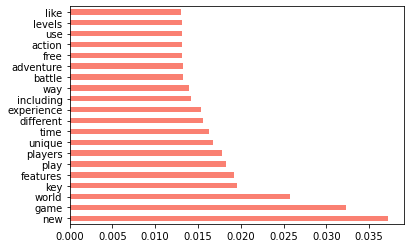

In [61]:
feature_importance.sort_values(ascending=False)
feature_importance.sort_values(ascending=False)[0:20].plot.barh(color="salmon")

## Testing bag of word, if it gets similar result as TFIDF, I'm probably gonna go with TFIDF

In [62]:
grid = {'n_estimators':[10,100,200],'max_depth':np.arange(1,30)}
rf = RandomForestClassifier(n_jobs=-1)
rfCV = GridSearchCV(rf,param_grid=grid,n_jobs=-1)
rfCV.fit(Xb_train,yb_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'n_estimators': [10, 100, 200]})

In [63]:
rfCV.best_score_

0.6867542090463672

In [64]:
rf=rfCV.best_estimator_

In [65]:
rf.feature_importances_

array([0.0085958 , 0.01037288, 0.0075367 , 0.00694622, 0.00705633,
       0.00923922, 0.00999504, 0.00746331, 0.00734022, 0.00814857,
       0.00788165, 0.00635599, 0.00799281, 0.00843131, 0.00817075,
       0.00775306, 0.00634054, 0.00846376, 0.00769304, 0.00886103,
       0.00803971, 0.01420456, 0.0061162 , 0.00638403, 0.01139807,
       0.00948096, 0.00646768, 0.00970289, 0.01012998, 0.01092098,
       0.00738612, 0.00604022, 0.01384314, 0.00815825, 0.01081426,
       0.00938539, 0.00926413, 0.0091481 , 0.0083714 , 0.0092879 ,
       0.02428027, 0.01005785, 0.01076059, 0.01172991, 0.00699807,
       0.00598951, 0.00906615, 0.00655993, 0.00729918, 0.00755917,
       0.00783561, 0.00618295, 0.00766747, 0.01090947, 0.01193047,
       0.00920767, 0.01151769, 0.00657884, 0.01102126, 0.00967255,
       0.01178965, 0.00759953, 0.00787047, 0.00793751, 0.00781925,
       0.00876116, 0.01725554, 0.01366143, 0.00711214, 0.00794397,
       0.00795598, 0.0152596 , 0.01408684, 0.01300586, 0.00774

### Analyze feature importance

In [49]:
feature_importance=pd.Series(rf.feature_importances_, index=Xb_train.columns)

<AxesSubplot:>

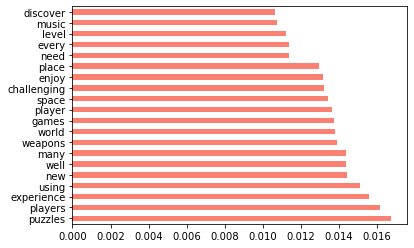

In [50]:
feature_importance.sort_values(ascending=False)



<AxesSubplot:>

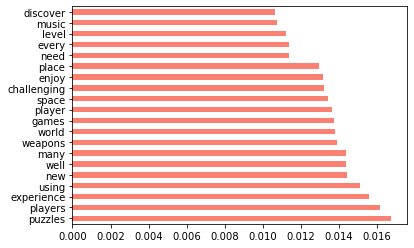

In [47]:
feature_importance.sort_values(ascending=False)[0:20].plot.barh(color="salmon")


In [102]:
X_train

,action,adventure,available,based,battle,best,build,challenge,challenging,character,...,unique,unlock,use,using,various,want,way,weapons,world,steam_appid
20829,0.000000,0.000000,0.0,0.078392,0.000000,0.256997,0.000000,0.089488,0.000000,0.0,...,0.066628,0.000000,0.0,0.0,0.0,0.000000,0.135877,0.000000,0.000000,810510
13497,0.000000,0.000000,0.0,0.000000,0.000000,0.162973,0.086847,0.085122,0.000000,0.0,...,0.190134,0.087379,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,597110
14628,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.232369,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.167696,0.000000,0.000000,635010
3709,0.000000,0.111469,0.0,0.000000,0.000000,0.119516,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.159329,316930
27058,0.000000,0.000000,0.0,0.000000,0.258073,0.000000,0.000000,0.000000,0.000000,0.0,...,0.206680,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1039080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.000000,0.196312,0.0,0.192612,0.000000,0.000000,0.000000,0.000000,0.231302,0.0,...,0.163708,0.000000,0.0,0.0,0.0,0.000000,0.166927,0.000000,0.140299,586340
19648,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,777860
9845,0.000000,0.000000,0.0,0.000000,0.000000,0.397469,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.157609,0.000000,0.000000,497260
10799,0.000000,0.000000,0.0,0.000000,0.164031,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.177314,0.000000,0.318638,0.112582,522340


# Gradient Boosting

In [113]:
grid = {'learning_rate':[0.01,0.001],'n_estimators':[100,200]}
gbt = GradientBoostingClassifier()
gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
gbtCV.fit(X_train,y_train)
print('Gradient Boosting Trees:')
print('optimal parameters:',gbtCV.best_params_)
print('optimal validation R2 =',gbtCV.best_score_.round(3))

Gradient Boosting Trees:
optimal parameters: {'learning_rate': 0.01, 'n_estimators': 200}
optimal validation R2 = 0.692


In [114]:
gbt=GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)
gbt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

In [115]:
gbt.score(X_train,y_train)

0.6939328277356447

In [116]:
gbt.score(X_test,y_test)

0.6941941202540995

## KNN

In [100]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [101]:
K=np.arange(20)+1
knn = KNeighborsClassifier()
knnCV=GridSearchCV(knn, param_grid={"n_neighbors":K},return_train_score=True, n_jobs=-1 )

In [102]:
knnCV.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True)

In [103]:
knnCV.best_score_

0.6871862031154389

In [104]:
knnCV.best_params_

{'n_neighbors': 19}

In [65]:
# keywords=feature_importance.sort_values(ascending=False).index[0:19].values

In [67]:
# steamDescriptions